In [1]:
# All the required data exploration and analysis package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# running the plot on the same window
%matplotlib inline

In [3]:
datafame_911=pd.read_csv('911.csv')

In [4]:
datafame_911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
datafame_911.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [6]:
# Getting all the datatypes 
datafame_911.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [7]:
# Getting all the datype and their constraint
datafame_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [8]:
# Shape of the dataset
datafame_911.shape

(663522, 9)

lets analyse the columns present in the dataset.
 - lat - Latitude 
    - lng - langitute
    - desc -Description of the Emergency Call
    - zip  -zipcode
    - title - tile of Emergency
    - timestamp - timestamp 
    - twp -township
    - addr- address
    -e - dummy varibale
    

In [9]:
# finding the null/NaN values in the dataframe.
datafame_911.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [11]:
datafame_911['zip']=datafame_911['zip'].fillna(0)

In [12]:
datafame_911['zip']=datafame_911['zip'].astype(int)

In [14]:
datafame_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [20]:
datafame_911['sub_title']=datafame_911['title'].apply(lambda title : title.split(':')[0])

In [23]:
datafame_911['sub_title'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: sub_title, dtype: int64

<AxesSubplot:xlabel='sub_title', ylabel='count'>

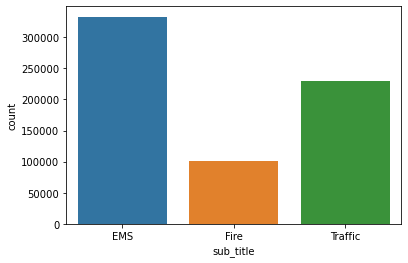

In [25]:
sns.countplot(x='sub_title',data=datafame_911)

changing the Dtype of Timestamp and breaking them into hr, month & day

In [27]:
datafame_911['timeStamp']=pd.to_datetime(datafame_911['timeStamp'])

In [32]:
datafame_911['hour']=datafame_911['timeStamp'].dt.hour
datafame_911['month']=datafame_911['timeStamp'].dt.month
datafame_911['dayof_week']=datafame_911['timeStamp'].dt.day_name()

In [34]:
datafame_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,sub_title,hour,month,dayof_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday


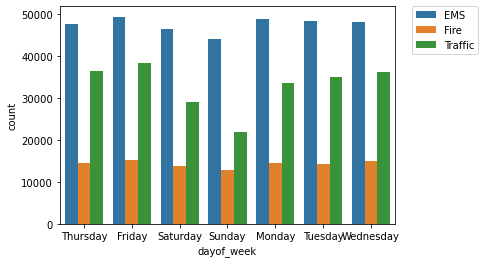

In [39]:
sns.countplot(x='dayof_week',data=datafame_911,hue='sub_title')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

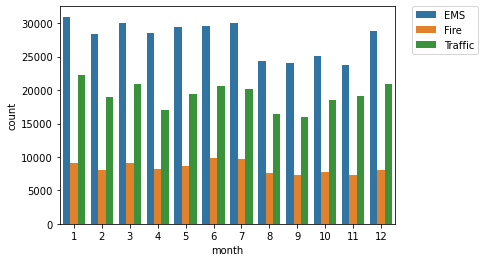

In [40]:
sns.countplot(x='month',data=datafame_911,hue='sub_title')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [41]:
bymonth=datafame_911.groupby('month').count()

In [42]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,sub_title,hour,dayof_week
month,,,,,,,,,,,,
1,62336,62336,62336,62336,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,55427,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,60027,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,53671,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,57509,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,60034,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,59832,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,48359,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,47213,47213,47213,47196,47213,47213,47213,47213,47213


In [43]:
byday=datafame_911.groupby('dayof_week').count()

In [44]:
byday

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,sub_title,hour,month
dayof_week,,,,,,,,,,,,
Friday,102942,102942,102942,102942,102942,102942,102895,102942,102942,102942,102942,102942
Monday,96745,96745,96745,96745,96745,96745,96707,96745,96745,96745,96745,96745
Saturday,89452,89452,89452,89452,89452,89452,89404,89452,89452,89452,89452,89452
Sunday,78859,78859,78859,78859,78859,78859,78823,78859,78859,78859,78859,78859
Thursday,98683,98683,98683,98683,98683,98683,98652,98683,98683,98683,98683,98683
Tuesday,97684,97684,97684,97684,97684,97684,97637,97684,97684,97684,97684,97684
Wednesday,99157,99157,99157,99157,99157,99157,99111,99157,99157,99157,99157,99157


<AxesSubplot:xlabel='dayof_week'>

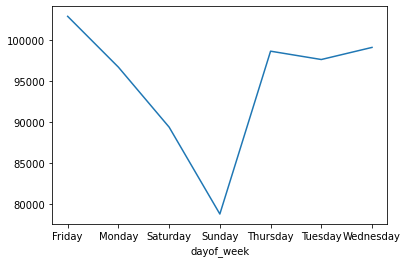

In [45]:
byday['twp'].plot()

<AxesSubplot:xlabel='month'>

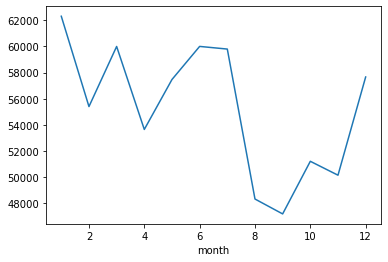

In [46]:
bymonth['twp'].plot()